In [65]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import os
from collections import defaultdict
import matplotlib as mpl
from tqdm.notebook import tqdm
from matplotlib.legend import Legend

sns.set_theme(font="Lato")
sns.set(rc={'figure.figsize':(11.7,8.27), 
            "font.family":"Lato", 
            # "font.style":"italic",
            "font.weight": "bold",
            'axes.edgecolor': 'black',
            "axes.labelweight": "bold",
            "axes.titleweight": "bold",
            "lines.linewidth": 6}, 
        font="Lato", 
        font_scale=2.2, 
        style="whitegrid")

In [71]:
df = None
path = "./tmp_files"
for filename in os.listdir(path):
    if filename.endswith(".pkl"):
        if df is None:
            df = pd.read_pickle(os.path.join(path, filename))
        else:
            tmp_df = pd.read_pickle(os.path.join(path, filename))
            df = pd.concat([df, tmp_df])

In [72]:
name_mapping = {"Attack Iter": "Testing Iteration Number"}

df.rename(columns=name_mapping,inplace=True)

In [73]:
task_mapping = {"Classification": "Type-1", 
                "Object Detection": "Type-2",
                "Image Generation": "Type-4",
                "Segmentation": "Type-3"}
# df.rename(rows=task_mapping, inplace=True)
df = df.replace(task_mapping)

In [100]:
for i in range(4):
    t = df.loc[(df["Task"]=="Type-{}".format(1+i)) & (df["Testing Iteration Number"] == 20)]["Model Count"].mean()
    print(t)


12.8
10.8
4.0
45.8


In [113]:
[df.loc[(df["Testing Iteration Number"] == 20) & (df["Epsilon"] == i)]["Model Count"].sum() for i in range(8, 25, 4)] 

[58, 71, 78, 79, 81]

In [115]:
x10 = [56, 59, 64, 69, 73]
x20 = [58, 71, 78, 79, 81]
sum([(x20[i] - x10[i])/x10[i] for i in range(5)])/5

0.14247413871010695

In [74]:
df.sort_values(by=['Task'], inplace=True)

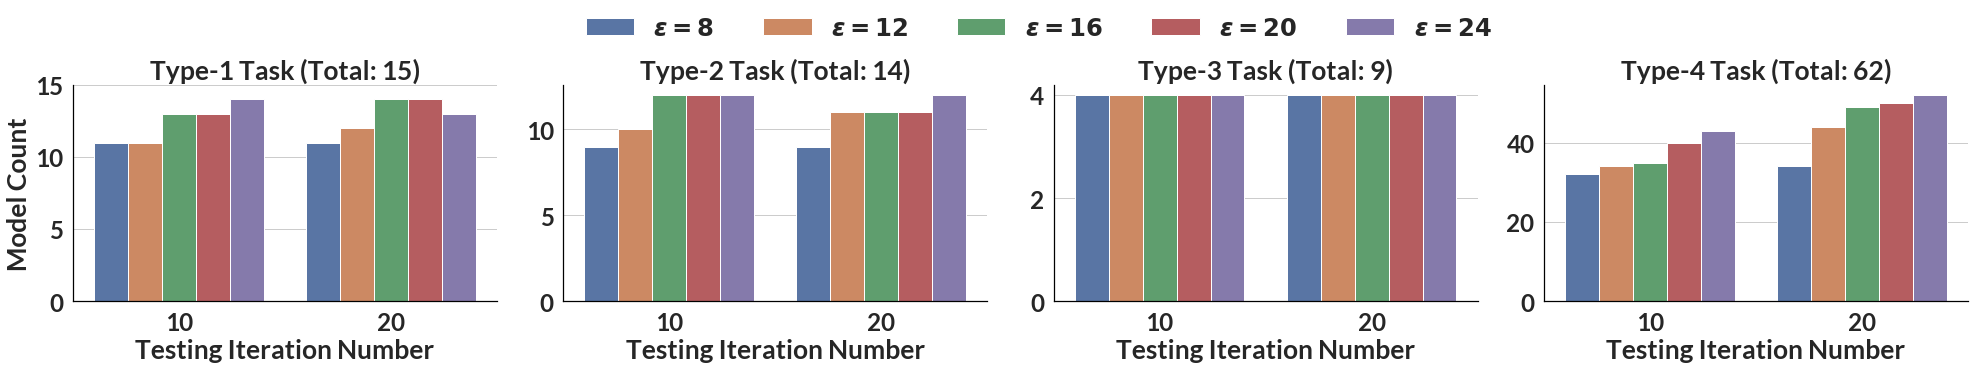

In [116]:
bp = sns.catplot(data=df, 
                 x="Testing Iteration Number", 
                 y="Model Count", 
                 hue="Epsilon",
                 kind="bar", 
                 aspect=1.4,
                 col="Task",
                #  order='Task',
                 sharey=False
                #  legend=False,
                #  legend="upper center"
                #  col="Attack Iter",
                #  dodge=True
                )

# bp.axes[0][1].set_yticks(np.arange(0,56,10))
# bp.set(yticks=np.arange(0,16,5))
bp.legend.set_title("")
bp.axes[0][0].set_yticks(np.arange(0,16,5))
for i in range(5):
    bp.legend.texts[i].set_text("$\\varepsilon={}$".format(8+4*i))
    
model_counts = [15, 14, 9, 62]
for i in range(4):
    bp.axes[0][i].set_title("Type-{} Task (Total: {})".format(i+1, model_counts[i]))
sns.move_legend(bp, "upper center", ncol=5, bbox_to_anchor=(.5, 1.1))

In [77]:
bp.figure.savefig("output_figure/pgd_bar_res_06.pdf", dpi=600, bbox_inches="tight")

In [103]:
avg_count = [ 12.8, 10.8, 4.0, 45.8]
for i in range(4):
    print(int(100*round(avg_count[i]/model_counts[i], 2)),"\%")

85 \%
77 \%
44 \%
74 \%
